# Predicting Diameter and Physical Harm of Asteroids using Machine Learning
**Authors** :
Colin Campbell (c_c953), Jake Worden (jrw294), Leah Lewis (lrl68) and Ryan Wakabayashi (rjw102)

**Abstract** :  [  ]

## Introduction

 

 

## Problem Statement 
Question: How to use machine learning to predict the diameter of asteroids and classify them as physically hazardous.
* Asteroid diameter prediction based upon Asteroid_Updated.csv from Kaggle.
* Predict whether an asteroid is physically hazardous to Earth. 

* Success measures:
	* 5 - 10 fold CV accuracy for all models
	* Regression models: R^2 score
	* Classification models: Precision, Recall, ROC/AUC
	
* Hope to achieve >85% R^2 for regression models (based upon kaggle responses) and then >=80% precision and recall for the classification models (low goal based on amount of data for imbalanced classes).

### Related Work

**Link to other work:** [Asteroid Diameter Estimators with added difficulty](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty)

## Data Management 
- Describe how did you evaluate your solution
- What evaluation metrics did you use?
- Describe a baseline system
- How much did your system outperform the baseline?
- Were there other systems evaluated on the same dataset? How did your system do in comparison to theirs?
- Show graphs/tables with results
- Error analysis
- Suggestions for future improvements

Description of the dataset (dimensions, names of variables with their description)

### Data Gathering


#### *Motivation*
This database was acquired from the Jet Propulsion Laboratory at California Institute of Technology's "Solar System Dynamics" on behalf of NASA. This information is related to the orbits, physical and characteristics, and discovery cirumstances for most known natural bodies in our solar system


#### *Composition*
	
| Feature | Description | Dtype | Null |
| ------- | ----------------- | ------ | :------: |
| a | Semi-major axis(au) | float64 | 2 |
| e | Eccentricity | float64 | 0 |
| i | Inclination with respect to x-y ecliptic plain(deg) | float64 | 0 |
| om | Longitude of the ascending node | float64 | 0 |
| w | Argument of perihelion | float64 | 0 |
| q | Perihelion distance(au) | float64 | 0 |
| ad | Aphelion distance(au) | float64 | 6 |
| per_y | Oribital period(YEARS) | float64 | 1 |
| data_arc | Data arc-span(d) | float64 | 15474 |
| condition_code | Orbit condition code | object | 867 |
| n_obs_used | Number of Observation used | int64 | 0 |
| H | Absolute magnitude parameter | float64 | 2689 |
| neo | Near Earth Object | object | 6 |
| pha | Physically Hazardous Asteroid | object | 16442 |
| diameter | Diameter of asteroid(Km) | object | 702078 |
| extent | Object bi/tri axial ellipsoid dimensions(Km) | object | 839696 |
| albedo | Geometric albedo | float64 | 703305 |
| rot_per | Rotation Period(h) | float64 | 820918 |
| GM | Standard gravitational parameter, Product of mass and gravitational constant | float64 | 839700 |
| BV | Color index B-V magnitude difference | float64 | 838693 |
| UB | Color index U-B magnitude difference | float64 | 838735 |
| IR | Color index I-R magnitude difference | float64 | 839713 |
| spec_B | Spectral taxonomic type(SMASSII) | object | 838048 |
| spec_T | Spectral taxonomic type(Tholen) | object | 838734 |
| G | Magnitude slope parameter | float64 | 839595 |
| moid | Earth minimum orbit intersection distance(au) | float64 | 16442 |
| class | Asteroid orbit class | object | 0 |
| n | Mean motion(deg/d) | float64 | 2 |
| per | Orbital period(d) | float64 | 6 |
| ma | Mean anomaly(deg) | float64 | 8 |

* Shape: (839714 , 31)
* Memory usage: 198.6+ MB

**Dataset found here:** [Asteroid_Updated.csv](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv)

### Data Pre-processing, Cleaning, Labeling, and Maintenance 

- Read in the .csv and visualized .head() and .info()
- Checked the number of Null values. If the sum of null values are > 700,000, we dropped the column
- If the remaining column has only Nulls, it is dropped
- If the remaining rows contain any Nulls, it is dropped

In [ ]:
import pandas as pd
df= pd.read_csv("./Asteroid_Updated.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

Print the sum of null values to determine which columns had a high percentage of null values.

In [ ]:
print(df.shape)
print(df.isnull().sum())

(839714, 31)
name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder as le

df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})
df['condition_code'] = df['condition_code'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 'D': 11, 'E': 12})
df['class'] = le().fit_transform(df['class'])

columns = ['name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'G', 'UB', 'IR', 'pha', 'spec_B', 'spec_T']
df = df.drop(columns=columns)


Drop the columns with high amount of null values. Keeping diameter since it is the target.

In [ ]:
print(df.isnull().sum())

After running into issues with incorrect datatypes, we found we needed to go through the data and turn the values into numerical values and those that did not become numeric, were dropped.

We then printed the sum of nulls to check that the dataframe had no null values.

In [ ]:
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['diameter'].astype(float)
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='any', axis=0, inplace=True)

print(df.shape)
print(df.isnull().sum())
print(df.dtypes)

(127910, 19)
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo               float64
diameter          float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object


### Exploratory Data Analysis 

Methods
* Visualization
  * seaborn pairplot - Used to see the interactions between features and the target values for both regression and classification
  * correlation heatmap - Used as a secondary source to visualize the strength of correlation between features and targets. 
* ANOVA
  * We utilized ANOVA to select and transform our dataset to keep the top 10 features in the dataset.

All of our methods came up with similar conclusions as to what features were deemed most important to our targets. Because of this, we saw an increase in accuracy values once we transformed the feature set to only contain these top 10.

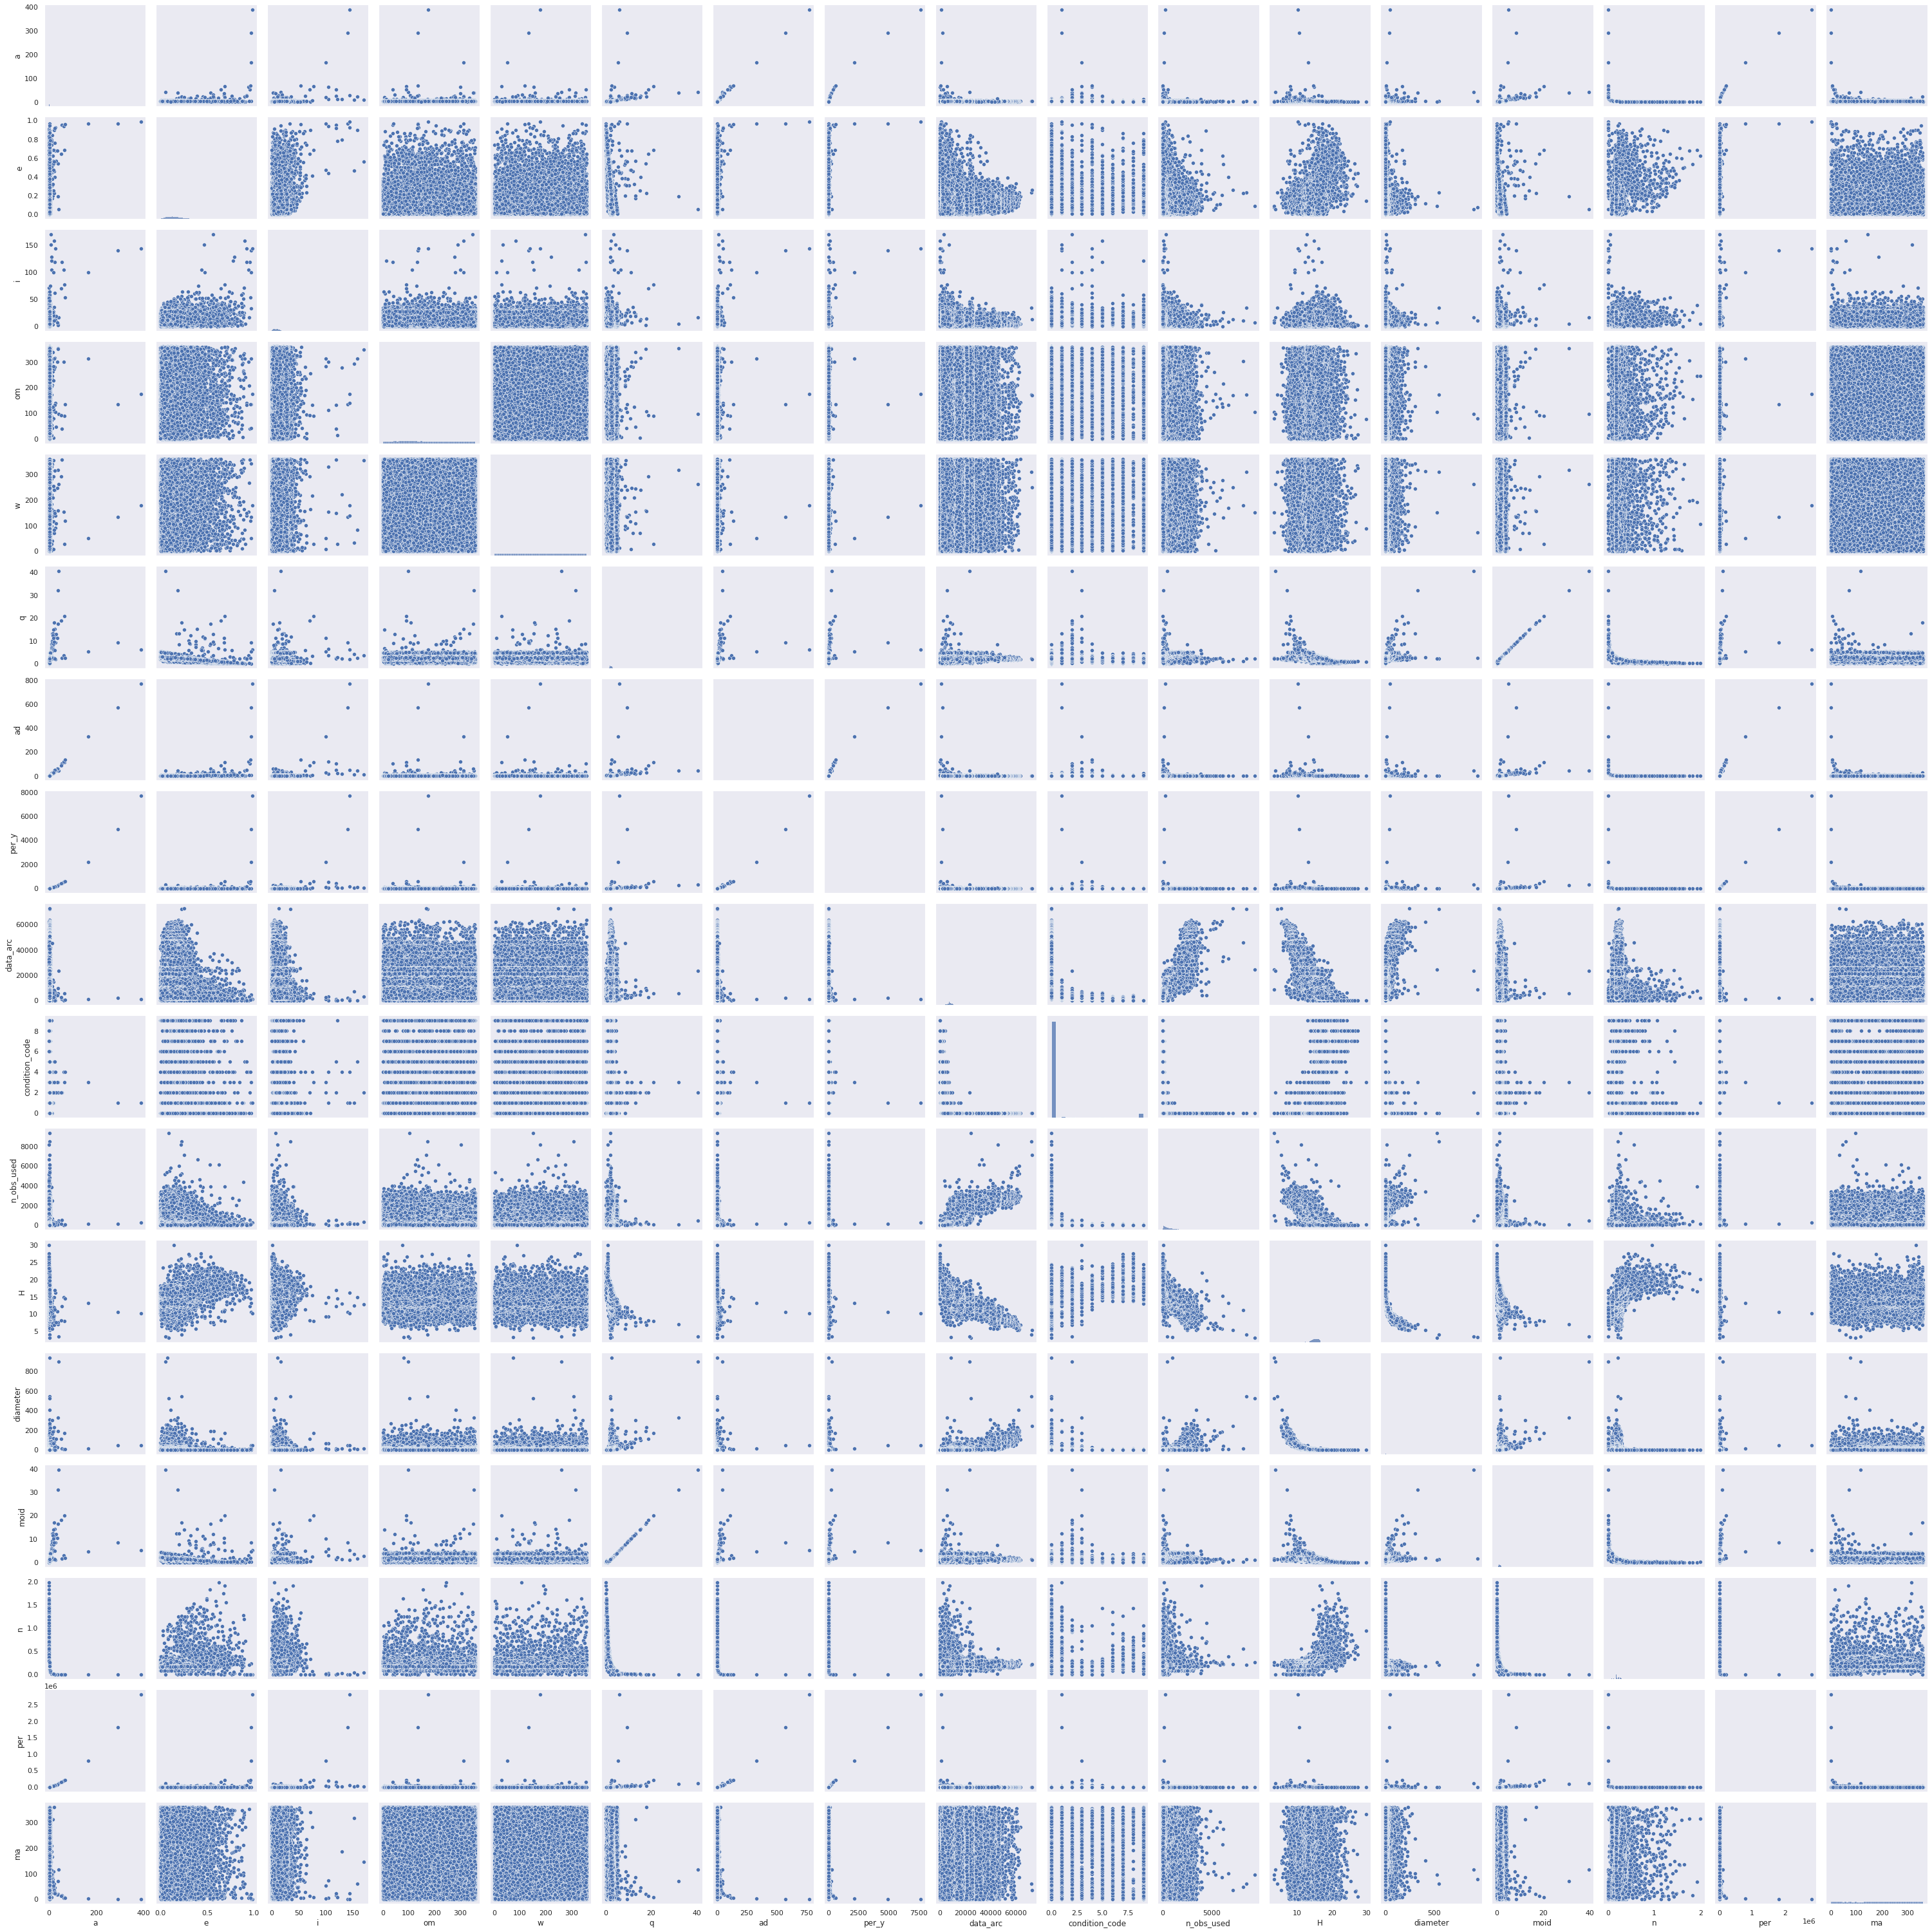

In [ ]:
import seaborn as sns

sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df)

import matplotlib.pyplot as plt
plt.show()

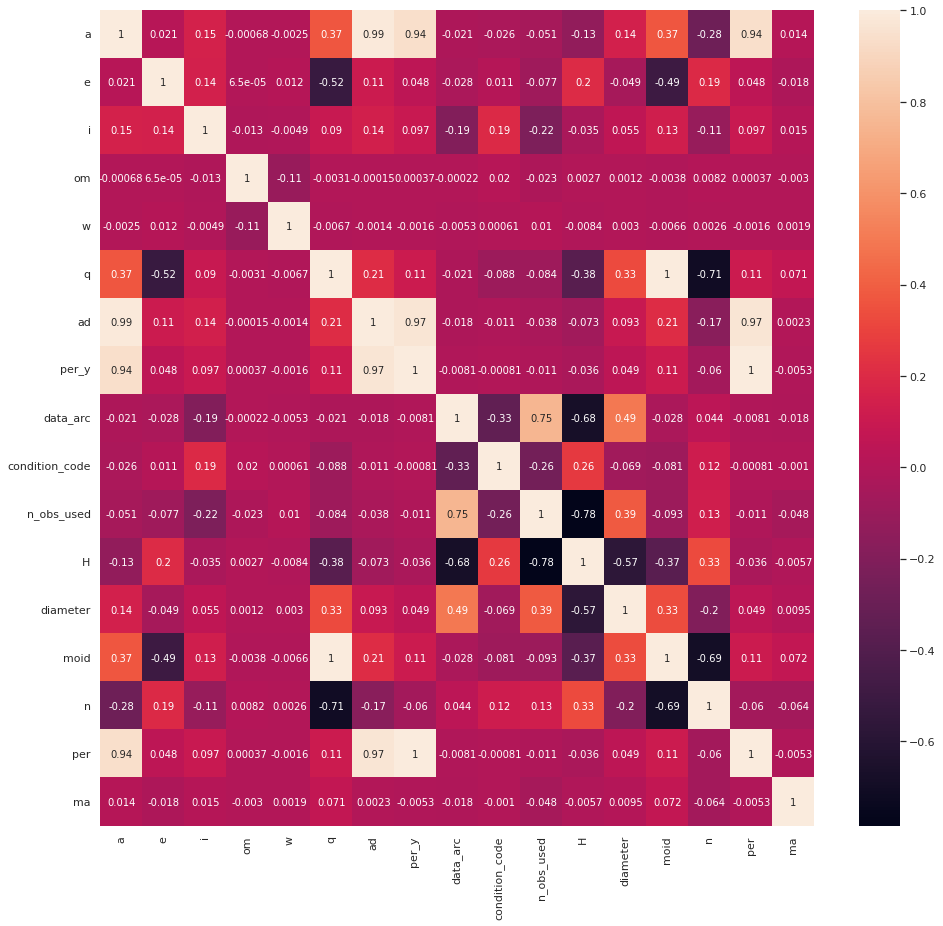

In [ ]:
plt.subplots(figsize = (16,15))
sns.heatmap(df.corr(),annot=True, annot_kws={'size':10})
# per, moid, H, per_y, ad, q, a

### Determine Feature Selection

In [ ]:
y = df.diameter
x = df.drop(columns=['diameter'])

In [ ]:
from sklearn.feature_selection import SelectKBest
# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
transX = anova.fit_transform(x, y)

for i in range(len(x.columns)):
    print(f'{x.columns[i]}: {anova.scores_[i]}')

print(transX.shape)

a: 31.637196697611962
e: 1.7842577610228874
i: 1.6621992239947645
om: 1.0029678571803002
w: 0.9957726525102555
q: 11.095961249580835
ad: 32.88636968270681
per_y: 40.74103699750825
data_arc: 8.099009943513074
condition_code: 0.5430670263398989
n_obs_used: 4.7797993210753
H: 17.841635817082636
neo: 10.855769669869455
moid: 11.167513458143228
class: 9.089789442546143
n: 9.20323399210887
per: 40.74103699750813
ma: 1.0542990472843297
(127910, 10)


Based on the ANOVA, heatmap, and pairplot we can see that there are multiple features that have high importance when determining diameter. 


1.   per / per_y
2.   ad
3.   a
4.   H
5.   q
6.   moid
7.   neo
8.   n
9.   class
10.  data_arc

## Machine Learning Approaches

We tried multiple models for our regression prediction. When it came to parameter tuning, some took an excessive amount of resources and we chose to look elsewhere. If a model performed badly after gridsearch and 10-fold cross validation, we looked into more data and other methods of improving but inevitably found other models that performed well with less tuning and less computational cost. 

**All attempted models**

Regression:
*   Random Forest 
*   KNN
*   SGD
*   Lasso
*   Ridge
*   SVR

Classification
*   Logistic Regression



### Describe the ML methods that you used and the reasons for their choice. 
What is the family of machine learnign algorithms you are using and why? 
* Supervised or Unsupervised?
* Regression or classification?

### Justify ML algorithms in terms of the problem itself and the methods you want to use. 
* How did you employ them? 
* What features worked well and what didn't?
* Provide documentation for integration  

### Tools and Infrastructure Tried and Not Used

Describe any tools and infrastruicture that you tried and ended up not using.
What was the problem? 
Describe infrastructure used. 

### **Regression Models for predicting diameter**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(transX ,y, test_size = 0.2, random_state=1)

#### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("Base KNN score:", knn.score(x_test,y_test))

In [ ]:
"""
param_grid = {'n_neighbors' : [3],
                'weights' : ['distance'],
                'metric' : ['chebyshev','euclidean', ]
                 }

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.6346160483361974


After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_neighbors: 3
*   weights: 'distance'
*   metric: 'euclidean'

In [ ]:

bestKNN = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
bestKNN.score(x_test,y_test)

0.6366782862195832

In [ ]:
bestKNN = KNeighborsRegressor(n_neighbors=4, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
bestKNN.score(x_test,y_test)

0.6610111106089167

In [ ]:
bestKNN = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
bestKNN.score(x_test,y_test)

0.6722015894259208

#### Lasso Regressor


In [ ]:
from sklearn.linear_model import  Lasso

lasso_base = Lasso()
lasso_base.fit(x_train, y_train)
pred_lasso = lasso_base.predict(x_test, y_test)
print("Base lasso score: ", lasso_base.score(x_test,y_test))

In [ ]:
"""
param_grid = [{'alpha':[1, 10, 25, 100, 500]},
              {'max_iter':[1000, 100, 500, 5000, 25000, 100000]},
              {'tol':[1e-4, 1e-6, 1e-10]},
              {'selection':['cyclic','random']},
              {'random_state':[10, 75, 200, 500, 1337, 5000]}]
gs = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=7, return_train_score=True)
lasso.fit(x_train, y_train)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

Parameter Tuning Results with Lasso

Alpha:
    When an alpha of 0 was available, it was always chosen and values were 0.36 for alpha = 0 and -.37 for alpha = 0.5. Any larger alpha values were not selected for by param_grid.

Selection:
    When alpha was not less than one, selection was chosen for, and 'random' was selected for as the type of selection. This gave a score of -.49.

Max_iter:
    When not tuning for selection, a max_iter of 1000 was selected with a score of -.49.

tol (tolerance):
    When not tuning for selection or max_iter, a tol of 0.0001 was chosen for with a score of -.49 once again.

Random_state:
    When not tuning for selection,max_iter, or tol a random state of 10 was chosen with the same score of -.49.

cv values:
    Any cv value that was under 7 gave a result that was larger than 1, getting larger the closer cv got to 0. The above values were calculated with cv=8, but with cv=7 a value of -.56 was obtained. The higher cv value the closer to 0 we got

#### Gradient Boosting Regressor

A fitted GBR model using it's default paramters. n_estimators = 100

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
print("Base GBR score: ",gbr.score(x_test, y_test))

0.8684282114486792

In [ ]:
param_grid = {'n_estimators' : [105],
             }
gbr = GradientBoostingRegressor()
gs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'n_estimators': 105}
0.8881429930907547


After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 105

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=105, random_state=0)
gbr.fit(x_train, y_train)
print("Optimal GBR score: ",gbr.score(x_test, y_test))

0.8690093928814328

####Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor()

rf_base.fit(xtrain, ytrain)
pred_rf_base = rf_base.predict(xtest,ytest)
print("Base RF score: ",rf_base.score(xtest,ytest))

In [ ]:
"""
param_grid = [{'n_estimators' : [100, 150, 200, 250, 300],
               'max_depth' : [None, 10, 20, 30, 40],
               'min_samples_split' : [2, 3, 4]}]

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True)
gs.fit(xtrain,ytrain)
print("\nBest parameters: ",gs.best_params_)
print(gs.best_score_)
"""

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 
*   max_depth
*   min_samples_split:


In [ ]:
rf_opt = RandomForestRegressor()

rf_opt.fit(xtrain, ytrain)
pred_rf_opt = rf_opt.predict(xtest,ytest)
print("Optimal RF score: ", rf_opt.score(xtest,ytest))

###**Classification models for predicting if an asteroid is hazardous:**

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression as lr

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=.2, stratify=y_c, random_state=1)

lreg = lr()
lreg.fit(x_train, y_train)
pred = lreg.predict(xtest)
print("Log Reg: ", lreg.score(pred,y_test))

## Experiments

Give a detailed summary of the results of your work.

 * Setup - Here is where you specify the exact performance measures you used.  
   * Describe the data used in experiment for presenting dataset: Datasheets for Dataset template 
   * Describe your accuracy or quality measure, and your performance (runtime or throughput) measure. 
   
 * Please use visualizations whenever possible. Include links to interactive visualizations if you built them. 
 
 * You can also submit a separated notebook as an appendix to your report if that makes the visualization/interaction task easier. 
   * It would be reasonable to submit your report as a notebook, but please make sure it runs on one of the two standard environments, and that you include any required files. 

## Conclusion
In this section give a high-level summary of your results. If the reader only reads one section of the report, this one should be it, and it should be self-contained.  You can refer back to the Experiments Section for elaborations. This section should be less than a page. In particular emphasize any results that were surprising.

## References
List the references that cited in your project.

## Appendix## 

Explain the contributions of each member to the project. Include all supporting materials, e.g., additional figures/tables, Python code technical derivations.